# 1. Implementación de la MPNeuron

In [1]:
import numpy as np

class MPNeuron:
    def _init_(self):
        self.threshold = None
    
    def model(self, x):
        #Input: [1, 0, 1, 0] [x1, x2, ..., xn]
        z = sum(x)
        return (z >= self.threshold) #Función a
    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)

In [2]:
#Instaciamos la neurona
mp_neuron = MPNeuron()

In [3]:
#Establecemos un threshold
mp_neuron.threshold = 3

In [4]:
#Evaluando diferentes casos de uso
mp_neuron.predict([[1, 0, 0, 0], [1, 1, 1, 1], [1, 1, 1, 0]])

array([False,  True,  True])

# 2. Caso practico: Diagnóstico de cáncer de mama con Neurona M - P

In [6]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

X = breast_cancer.data
Y = breast_cancer.target

In [9]:
dir(breast_cancer)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [10]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

## 2.2 Visualizar del conjunto de datos

In [11]:
import pandas as pd

df = pd.DataFrame(X, columns=breast_cancer.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

## 2.3 División del conjunto de datos

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df, Y, stratify=Y)

print('Tamaño del conjunto de datos de entrenamiento: ', len(X_train))
print('Tamaño del conjunto de datos de pruebas: ', len(X_test))

Tamaño del conjunto de datos de entrenamiento:  426
Tamaño del conjunto de datos de pruebas:  143


## 2.4. Implementación de una MPNeuron más avanzada

In [14]:
import numpy as np
from sklearn.metrics import accuracy_score

class MPNeuron:
    def _init_(self):
        self.threshold = None
    
    def model(self, x):
        #Input: [1, 0, 1, 0] [x1, x2, ..., xn]
        z = sum(x)
        return (z >= self.threshold) #Función a
    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y):
        accuracy = {}
        # Seleccionamos un threshold entre el número de características de entrada
        for th in range(X.shape[1] + 1):
            self.threshold = th
            Y_pred = self.predict(X)
            accuracy[th] = accuracy_score(Y_pred, Y)
        #Seleccionamos el threshold que mejor resultados proporciona
        self.threshold = max(accuracy, key=accuracy.get)

Seguimos teniendo un problema debido a que en nuestro conjunto de datos las características de entrada reciben valores continuos, sin embargo, nuestra NPNeuron solo procesa características de entrada con valor binario

Matplotlib is building the font cache; this may take a moment.


[0, 0, 1, 1, 1, 0, 0]
Categories (2, int64): [0 < 1]


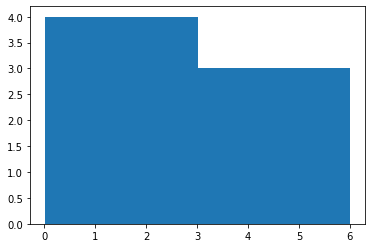

In [15]:
# Para transformar un valor binario
import matplotlib.pyplot as plt

print(pd.cut([0.04, 2, 4, 5, 6, 0.02, 0.6], bins=2, labels=[0, 1]))
plt.hist([0.04, 2, 4, 5, 6, 0.02, 0.6], bins=2)
plt.show()

In [16]:
# Transformamos las características de entrada en un valor binario
X_train_bin = X_train.apply(pd.cut, bins=2, labels=[1, 0])
X_test_bin = X_test.apply(pd.cut, bins=2, labels=[1, 0])

X_train_bin

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
516,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1
321,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
474,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
293,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
413,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1
157,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
344,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
441,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1


In [17]:
# Instanciamos el modelo MPNeuron
mp_neuron = MPNeuron()

# Encontramos el threshold óptimo
mp_neuron.fit(X_train_bin.to_numpy(), Y_train)

In [18]:
# Threshold óptimo seleccionado
mp_neuron.threshold

27

In [24]:
# Realizamos predicciones para ejemplos nuevos que no se encuentran en el conjunto de datos de entrenamiento
Y_pred = mp_neuron.predict(X_test_bin.to_numpy())

In [25]:
Y_pred

array([ True,  True,  True, False,  True,  True,  True,  True, False,
        True, False,  True, False,  True,  True, False,  True, False,
       False,  True, False, False,  True,  True, False,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True, False, False,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True, False, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False, False, False,  True, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True, False,  True,  True, False, False,
        True, False, False,  True,  True, False, False,  True,  True,
       False, False,  True,  True, False, False, False, False,  True,
        True, False,

In [23]:
# Calculamos la exactitud de nuestra predicción
accuracy_score(Y_test, Y_pred)

0.8671328671328671

In [26]:
# Calculamos la matriz de confusión
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, Y_pred)

array([[45,  8],
       [11, 79]], dtype=int64)